In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

# load data

In [2]:
heart = pd.read_csv("/content/heart.csv")

In [3]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Check Null Values

In [5]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Encoding Categorical Data (one hot encoding)

In [6]:
heart = pd.get_dummies(heart,drop_first=True)
heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [7]:
heart.dtypes

Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
HeartDisease           int64
Sex_M                  uint8
ChestPainType_ATA      uint8
ChestPainType_NAP      uint8
ChestPainType_TA       uint8
RestingECG_Normal      uint8
RestingECG_ST          uint8
ExerciseAngina_Y       uint8
ST_Slope_Flat          uint8
ST_Slope_Up            uint8
dtype: object

# Checking For Outliers

In [8]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.789760,0.188453,0.221133,0.050109,0.601307,0.193900,0.404139,0.501089,0.430283
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.391287,0.415236,0.218289,0.489896,0.395567,0.490992,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
Q1 = heart.quantile(0.25)
Q3 = heart.quantile(0.75)
IQR = Q3-Q1
print((heart<(Q1-1.5*IQR)) | (heart>(Q3+1.5*IQR)))

       Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0    False      False        False      False  False    False         False   
1    False      False        False      False  False    False         False   
2    False      False        False      False  False    False         False   
3    False      False        False      False  False    False         False   
4    False      False        False      False  False    False         False   
..     ...        ...          ...        ...    ...      ...           ...   
913  False      False        False      False  False    False         False   
914  False      False        False       True  False    False         False   
915  False      False        False      False  False    False         False   
916  False      False        False      False  False    False         False   
917  False      False        False      False  False    False         False   

     Sex_M  ChestPainType_ATA  ChestPainType_NAP  C

# Checking For Outliers Using Boxplot

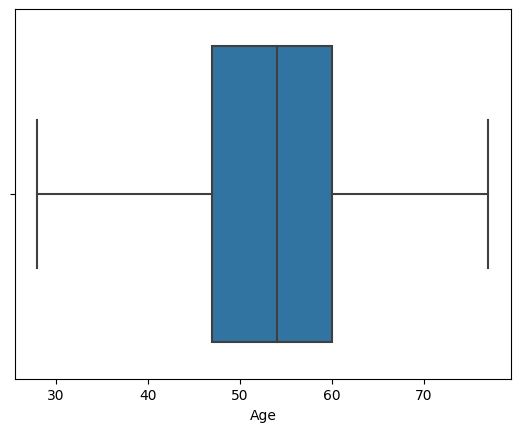

In [10]:
sns.boxplot(x=heart['Age'])
plt.show()

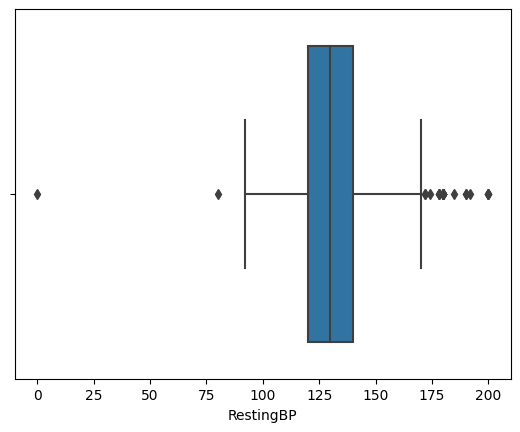

In [11]:
sns.boxplot(x=heart['RestingBP'])
plt.show()

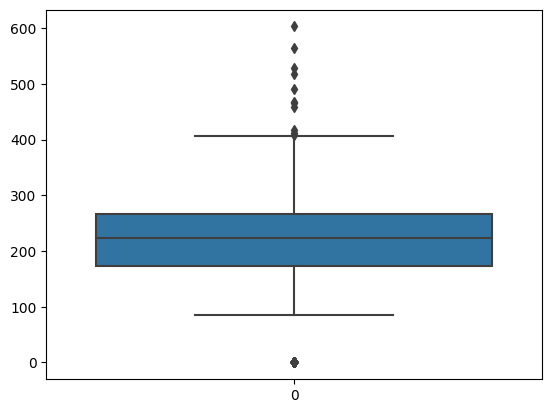

In [12]:
sns.boxplot(heart['Cholesterol'])
plt.show()

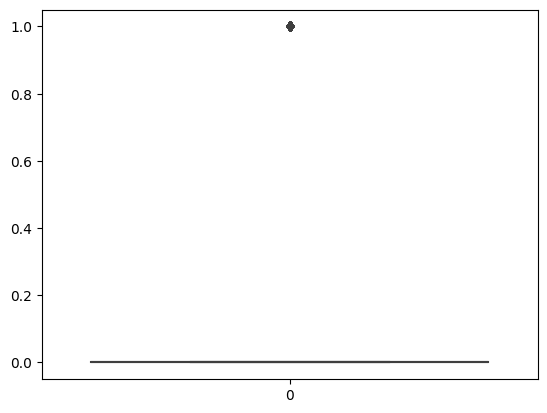

In [13]:
sns.boxplot(heart['FastingBS'])
plt.show()

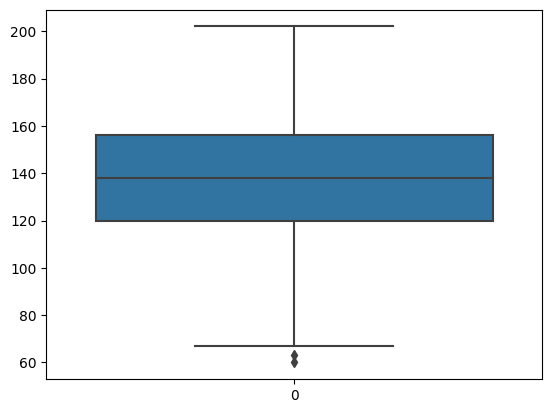

In [14]:
sns.boxplot(heart['MaxHR'])
plt.show()

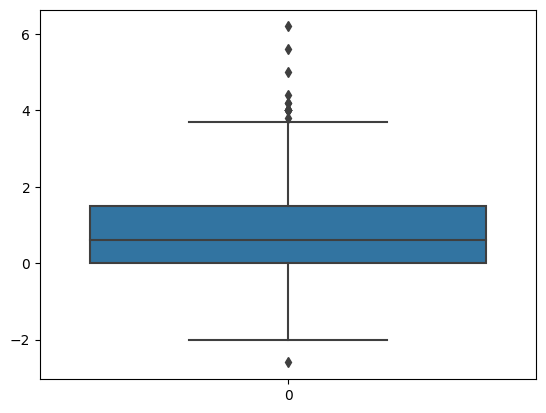

In [15]:
sns.boxplot(heart['Oldpeak'])
plt.show()

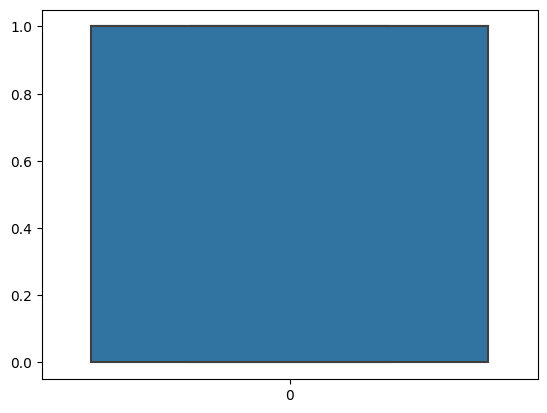

In [16]:
sns.boxplot(heart['HeartDisease'])
plt.show()

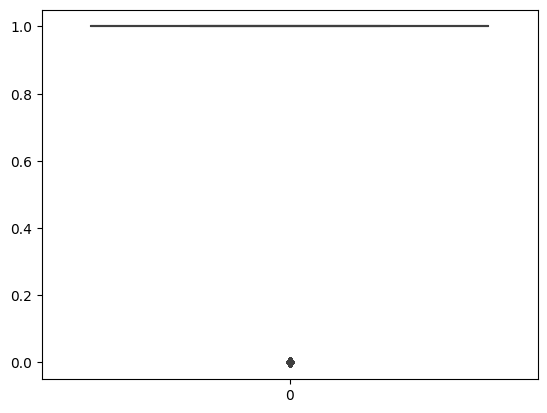

In [18]:
sns.boxplot(heart['Sex_M'])
plt.show()

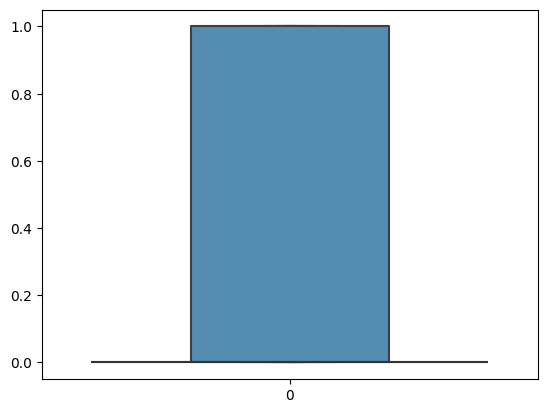

In [19]:
sns.boxenplot(heart['ChestPainType_ATA'])
plt.show()

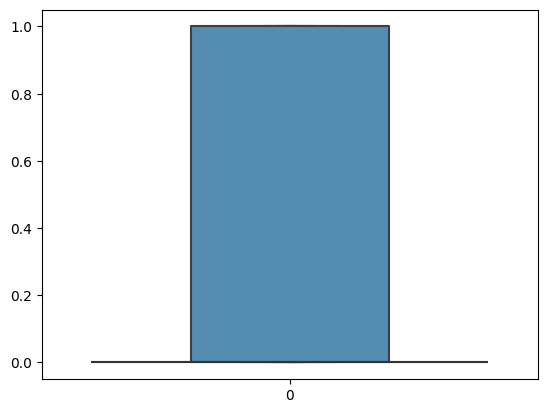

In [20]:
sns.boxenplot(heart['ChestPainType_NAP'])
plt.show()

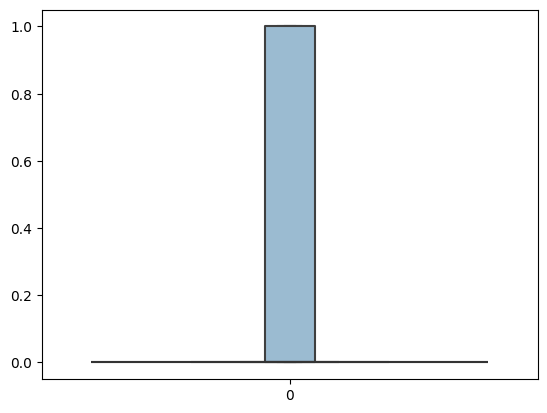

In [21]:
sns.boxenplot(heart['ChestPainType_TA'])
plt.show()

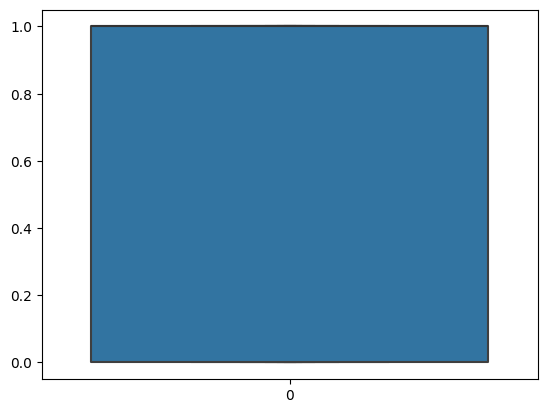

In [22]:
sns.boxenplot(heart['RestingECG_Normal'])
plt.show()

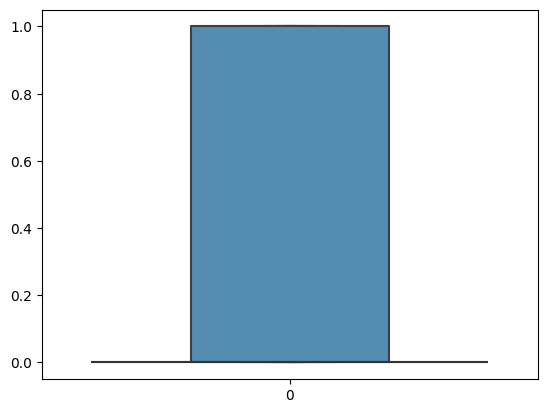

In [23]:
sns.boxenplot(heart['RestingECG_ST'])
plt.show()

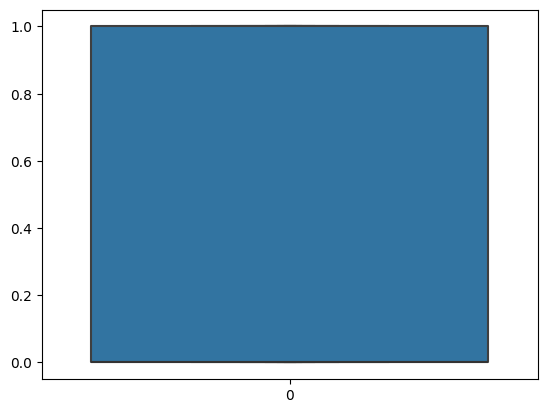

In [24]:
sns.boxenplot(heart['ExerciseAngina_Y'])
plt.show()

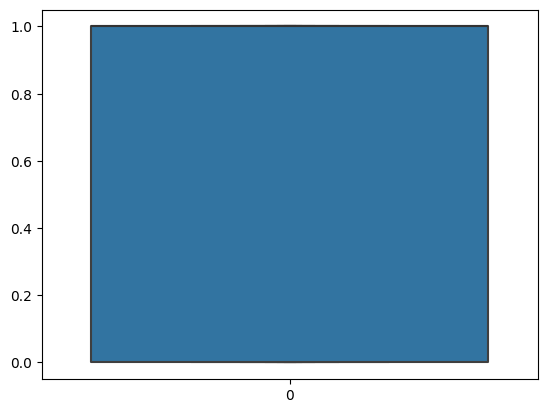

In [25]:
sns.boxenplot(heart['ST_Slope_Flat'])
plt.show()

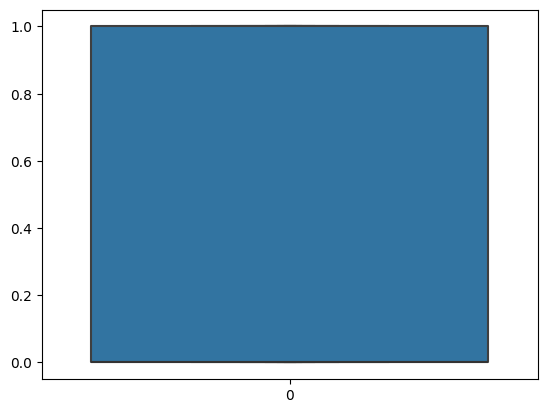

In [26]:
sns.boxenplot(heart['ST_Slope_Up'])
plt.show()

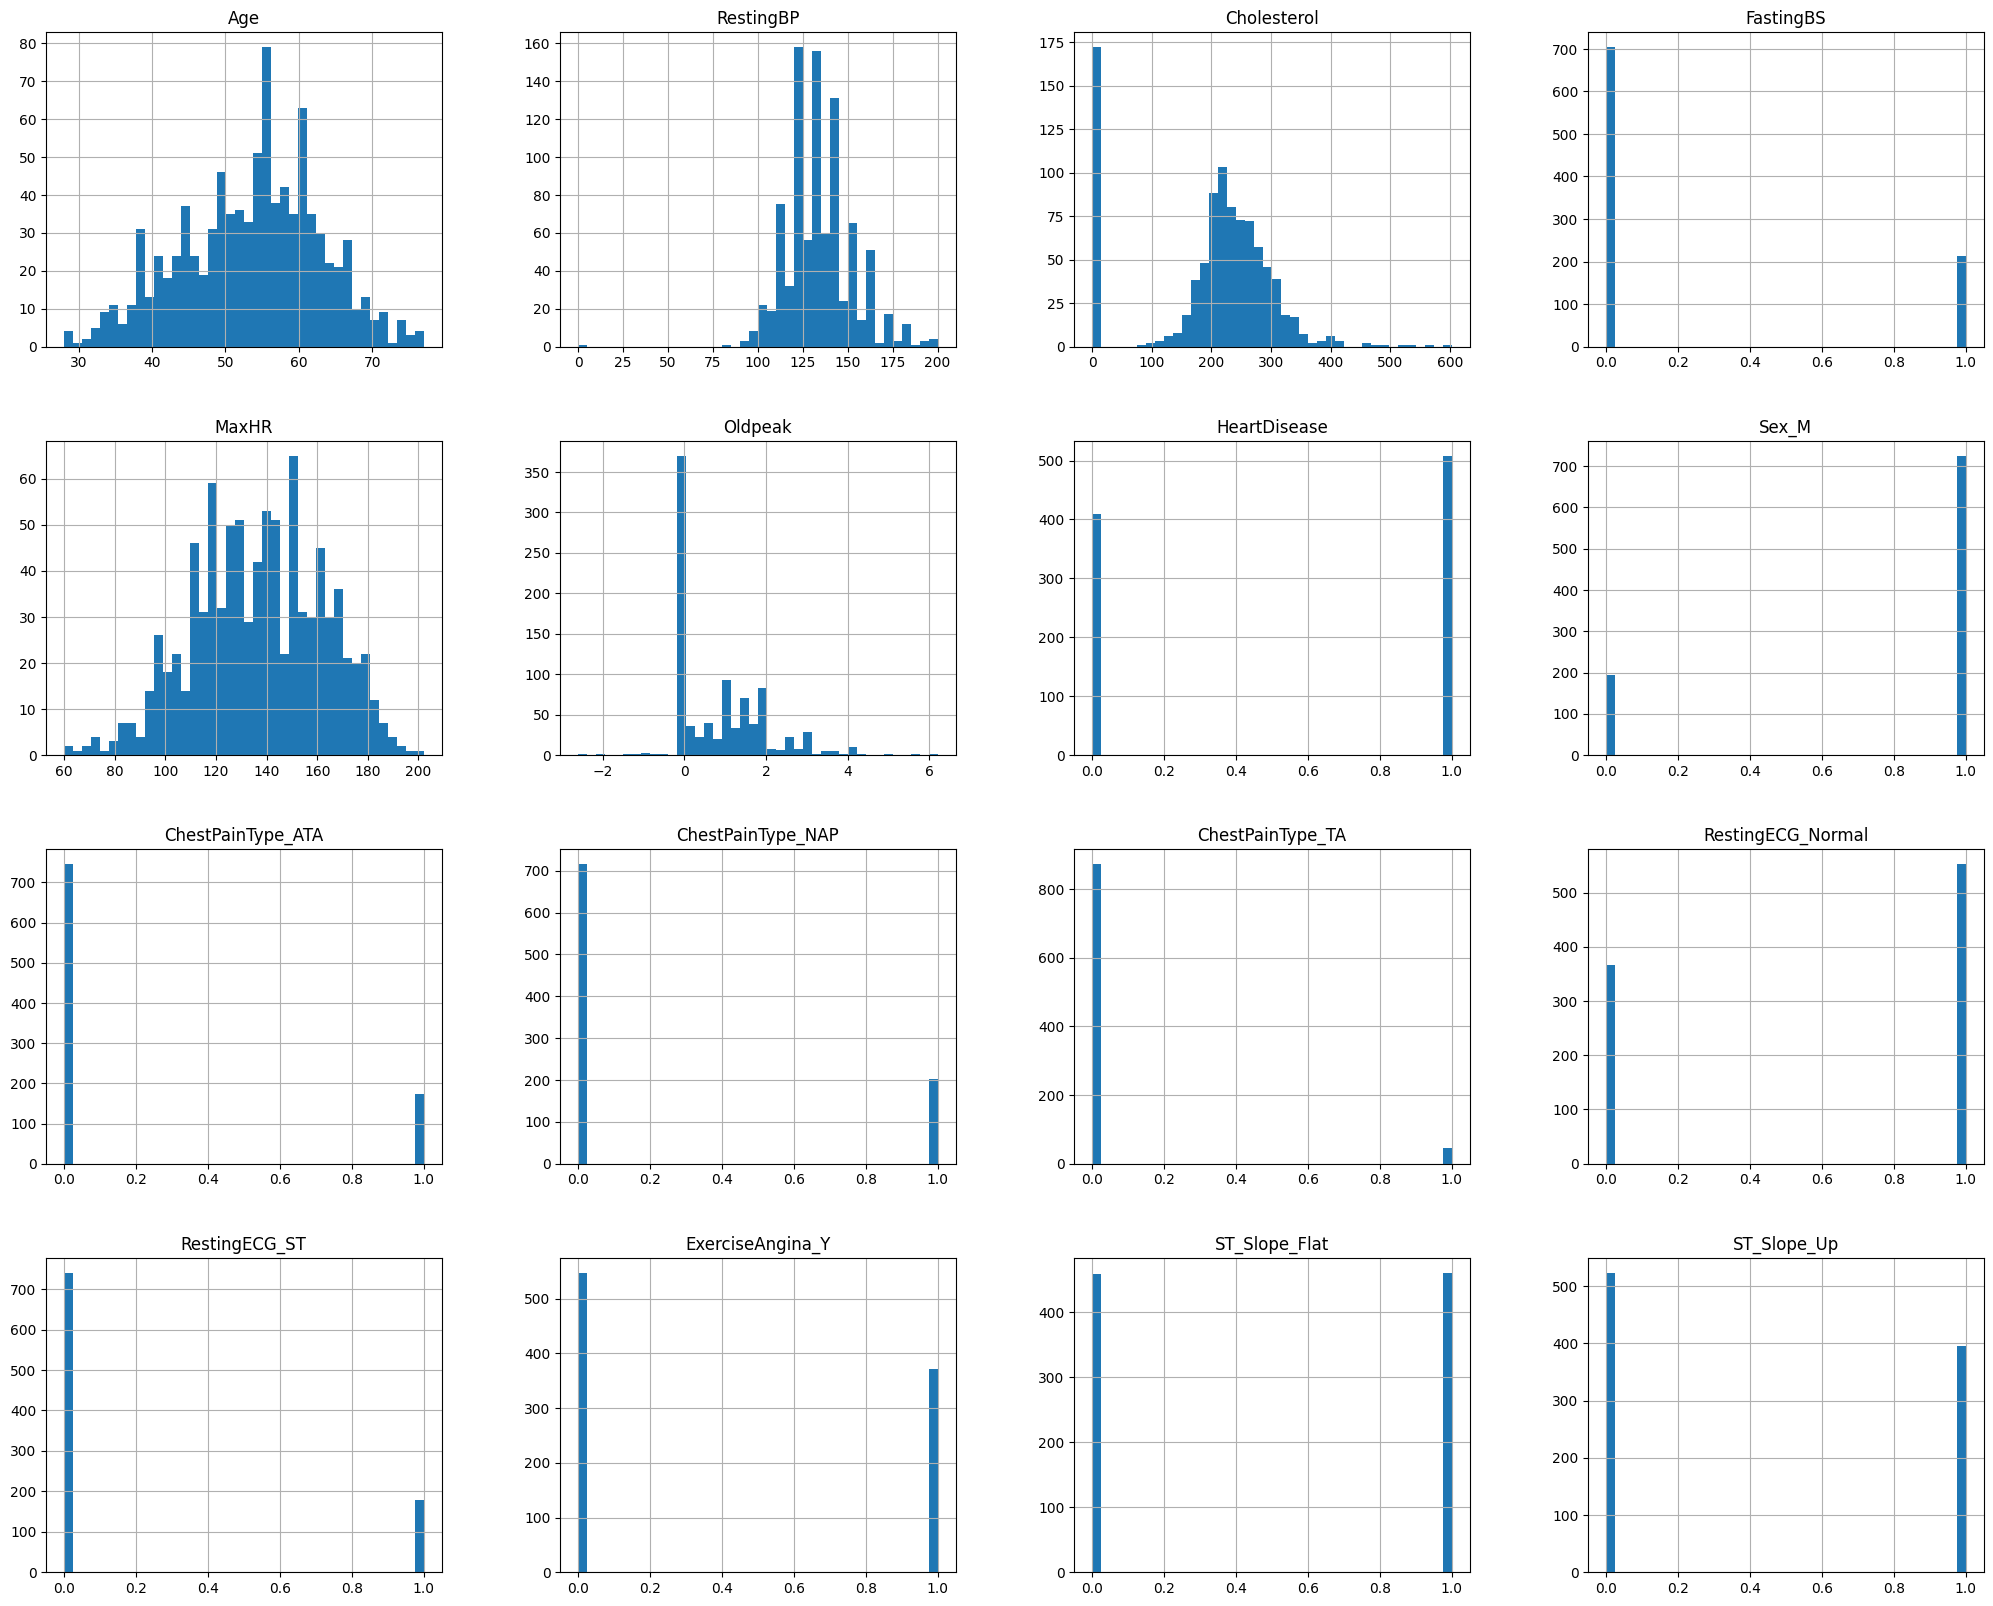

In [27]:
heart.hist(bins=40,figsize=(25,20))
plt.show()

# handling outliers

In [30]:
heart = heart[heart['Cholesterol']!=0]
heart = heart[heart['RestingBP']!=0]

In [38]:
# handling outliers using log transformtion
heart["Log_Oldpeak"] = heart['Oldpeak'].map(lambda i:np.log(i) if i> 0 else 0)
print(heart['Oldpeak'].skew())
print(heart["Log_Oldpeak"].skew())

-1.018222114527977
-2.304987219809447


<Axes: >

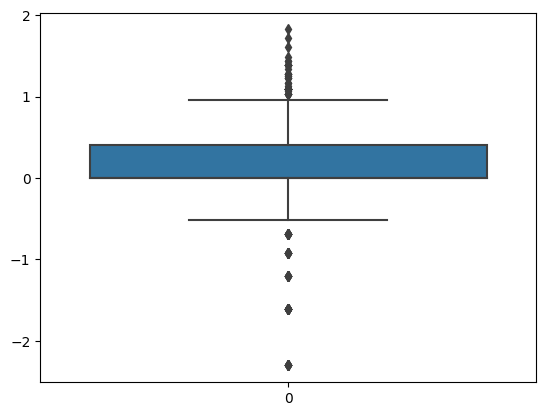

In [36]:
sns.boxplot(heart['Oldpeak'])

<Axes: >

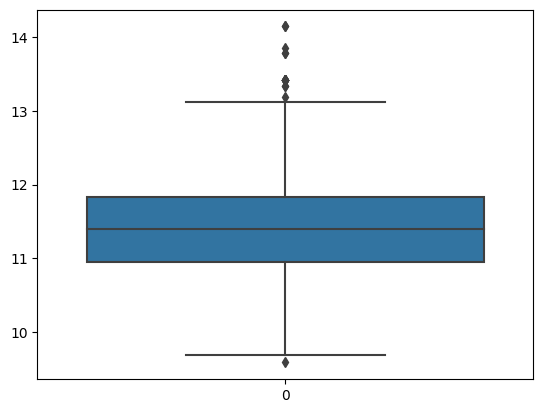

In [32]:
# handling outliers using sqrt
heart['RestingBP'] = np.sqrt(heart['RestingBP'])
sns.boxplot(heart['RestingBP'])

<Axes: >

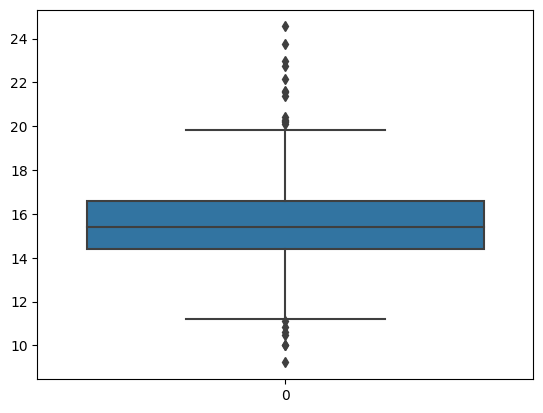

In [34]:
heart['Cholesterol'] = np.sqrt(heart['Cholesterol'])
sns.boxplot(heart['Cholesterol'])

# Check multicollinearity

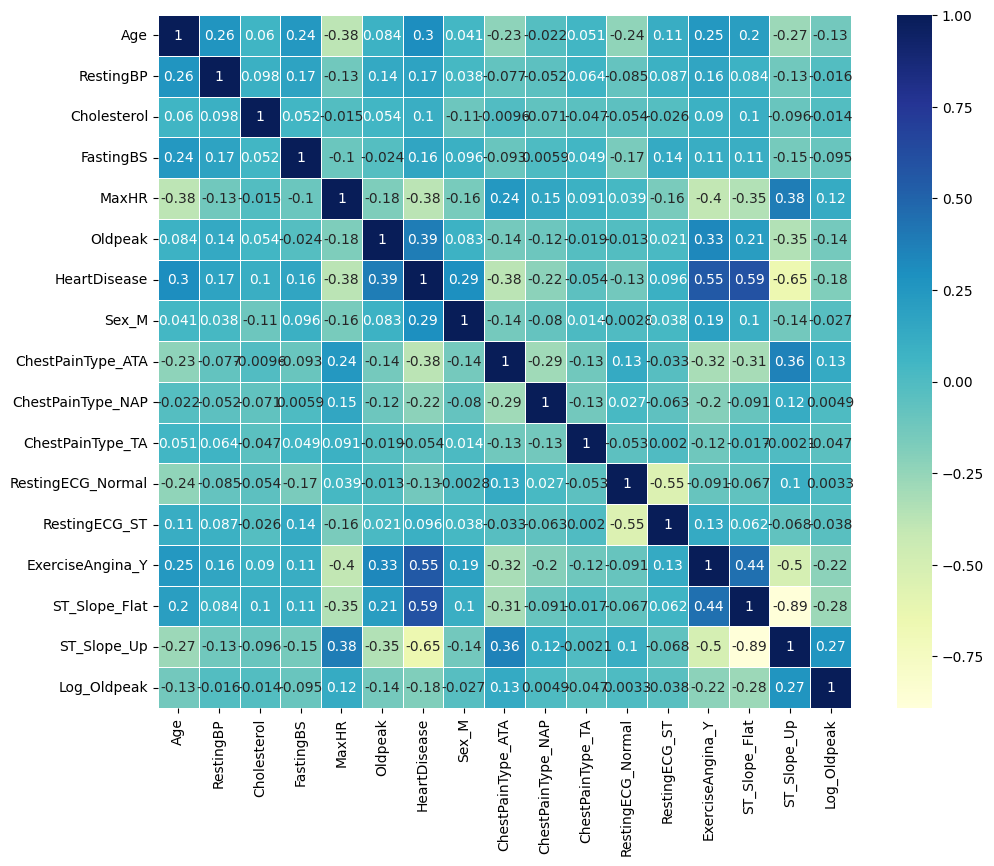

In [39]:
x,y = plt.subplots(figsize=(12,9))
sns.heatmap(heart.corr(),cmap='YlGnBu',square=True,linewidths=0.5,annot=True)
plt.show()

# Scaling

In [40]:
heart = pd.DataFrame(heart)
x = heart.drop(['HeartDisease'],axis =1)
y = heart['HeartDisease']

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(heart)
heart=scaler.transform(heart)
heart

array([[-1.35607325,  0.43573544,  0.80055566, ..., -0.95029534,
         1.06655324,  0.43788068],
       [-0.40865641,  1.54000977, -1.15521162, ...,  1.05230444,
        -0.9375997 ,  0.43788068],
       [-1.67187886, -0.14604425,  0.70374062, ..., -0.95029534,
         1.06655324,  0.43788068],
       ...,
       [ 0.43349189, -0.14604425, -2.23083399, ...,  1.05230444,
        -0.9375997 , -3.44639016],
       [ 0.43349189, -0.14604425, -0.09323376, ...,  1.05230444,
        -0.9375997 ,  0.43788068],
       [-1.56661032,  0.32108484, -1.25762347, ..., -0.95029534,
         1.06655324,  0.43788068]])

# Model logistic regression

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=33,shuffle=True)
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=0.2,random_state=33)
LogisticRegressionModel.fit(x_train, y_train)
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(x_train,  y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(x_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)

LogisticRegressionModel Train Score is :  0.8246869409660107
LogisticRegressionModel Test Score is :  0.8128342245989305
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [100]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [43]:
y_pred = LogisticRegressionModel.predict(x_test)
y_pred_prob = LogisticRegressionModel.predict_proba(x_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is :  [0 0 0 1 1 1 1 1 1 0]
Prediction Probabilities Value for LogisticRegressionModel is :  [[0.79902708 0.20097292]
 [0.76756858 0.23243142]
 [0.53974425 0.46025575]
 [0.43966178 0.56033822]
 [0.1007804  0.8992196 ]
 [0.43097651 0.56902349]
 [0.31046751 0.68953249]
 [0.08281623 0.91718377]
 [0.18844434 0.81155566]
 [0.80653878 0.19346122]]


In [44]:
acc =accuracy_score(y_test,y_pred)
print("accuracy score is : ",acc)

accuracy score is :  0.8128342245989305


In [45]:
ps = precision_score(y_test,y_pred,average='macro')
print('precision score is',ps)

precision score is 0.8105939004815409


In [46]:
rc = recall_score(y_test,y_pred,average='macro')
print('recall_score',rc)

recall_score 0.8146341463414635


In [47]:
 fs = f1_score(y_test,y_pred, average=None)
print('f1 score is',fs)

f1 score is [0.82758621 0.79532164]
